[View in Colaboratory](https://colab.research.google.com/github/sephiroth7712/DL/blob/master/cifar_10.ipynb)

In [1]:
from keras.datasets import cifar10
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

Using TensorFlow backend.


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


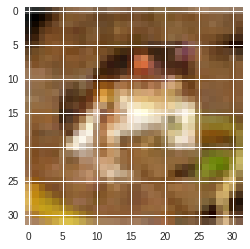

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtrain[0])

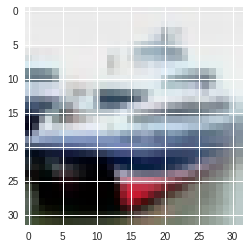

In [3]:
#classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
plt.imshow((xtest[1]))

In [0]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest=to_categorical(ytest)

In [0]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain/=255
xtest/=255

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

In [7]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
__________

In [8]:
model.fit(xtrain,ytrain,epochs=10,batch_size=50)
#Final evaluation of the model
scores=model.evaluate(xtest,ytest,verbose=0)
print("Large CNN Error :",(100-scores[1]*100),'%')

Epoch 1/10
50000/50000 [==============================] - 18s 356us/step - loss: 1.3876 - acc: 0.5000
Epoch 2/10
50000/50000 [==============================] - 16s 315us/step - loss: 1.0107 - acc: 0.6446
Epoch 3/10
50000/50000 [==============================] - 16s 316us/step - loss: 0.8389 - acc: 0.7054
Epoch 4/10
50000/50000 [==============================] - 16s 314us/step - loss: 0.7063 - acc: 0.7507
Epoch 5/10
50000/50000 [==============================] - 16s 315us/step - loss: 0.5902 - acc: 0.7912
Epoch 6/10
50000/50000 [==============================] - 16s 314us/step - loss: 0.4923 - acc: 0.8263
Epoch 7/10
50000/50000 [==============================] - 16s 315us/step - loss: 0.4081 - acc: 0.8567
Epoch 8/10
50000/50000 [==============================] - 16s 314us/step - loss: 0.3428 - acc: 0.8804
Epoch 9/10
50000/50000 [==============================] - 16s 315us/step - loss: 0.2918 - acc: 0.8963
Epoch 10/10
50000/50000 [==============================] - 16s 314us/step - loss: 

In [9]:
predv=model.predict(xtest)
print(predv[1])

[5.01350223e-05 4.84424412e-01 1.79539848e-14 6.46885150e-16
 5.70623184e-18 1.86370596e-18 3.80856831e-20 1.01584875e-19
 5.15525460e-01 1.70455881e-08]


In [10]:
print(ytest[1])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
